In [10]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
#from cftime import datetime 
from datetime import datetime, timedelta
#import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
from dask.distributed import LocalCluster, Client
import dask.array as da
import dask.dataframe as dd
import dask
from dask import delayed
from dask.diagnostics import ProgressBar  # Import the ProgressBar class
import calendar
import glob
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_262374/1870643686.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [11]:
###### SPRING #########
season = 'spr'
file_pattern_1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-03-*.nc'
file_pattern_2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-04-*.nc'
file_pattern_3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-05-*.nc'
#start_cftime_date = '0001-03-01'

# ###### SUMMER #########
# season = 'sum'
# file_pattern_1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-06-*.nc'
# file_pattern_2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-07-*.nc'
# file_pattern_3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-08-*.nc'
# #start_cftime_date = '0001-06-01'

# ###### AUTUMN #########
# season = 'aut'
# file_pattern_1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-09-*.nc'
# file_pattern_2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-10-*.nc'
# file_pattern_3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-11-*.nc'
# #start_cftime_date = '0001-09-01'

# ###### WINTER #########
# season = 'win'
# file_pattern_1 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-12-*.nc'
# file_pattern_2 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-01-*.nc'
# file_pattern_3 = 'Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-02-*.nc'
# #start_cftime_date = '0001-12-01'


#==========================================================================

# Open the datasets 
ds_1 = xr.open_mfdataset(file_pattern_1)
ds_2 = xr.open_mfdataset(file_pattern_2)
ds_3 = xr.open_mfdataset(file_pattern_3)

# Concatenate along the time dimension
ds_combined = xr.concat([ds_1, ds_2, ds_3], dim='time')


In [12]:
timee = ds_combined.variables['time']
#times = xr.cftime_range(start=start_cftime_date, periods=672, freq="1H", calendar="noleap")    
lon = ds_combined.variables['lon']
lat = ds_combined.variables['lat']
lev = ds_combined.variables['lev']
dst = ds_combined.transpose("lev", ...)

geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

temp = dst.variables['T']
elect = dst.variables['e']
Fep = dst.variables['Fep']
Mgp = dst.variables['Mgp']
Nap = dst.variables['Nap']

electav = elect.mean(dim='time')
Fepav = Fep.mean(dim='time')
Mgpav = Mgp.mean(dim='time')
Napav = Nap.mean(dim='time')

#===================================================================================================

altitude_min = 81
altitude_max = 130

max_index = np.argmin(np.abs(Zavg.values - altitude_min))
min_index = np.argmin(np.abs(Zavg.values - altitude_max))

# Slice the array along the altitude dimension
Fep_sliced = Fepav[min_index:max_index + 1,:,:]
Nap_sliced = Napav[min_index:max_index + 1,:,:]
Mgp_sliced = Mgpav[min_index:max_index + 1,:,:]
elect_sliced = electav[min_index:max_index + 1,:,:]

Zavg_sliced = Zavg[min_index:max_index + 1]
lev_sliced = lev[min_index:max_index + 1]

M_Factor = ( Nap_sliced + Mgp_sliced + Mgp_sliced + Fep_sliced) / Fep_sliced
e_Factor = elect_sliced / Fep_sliced 

In [9]:
########### Save to nc file ##########

# Create an empty xarray Dataset to store variables
result_dataset = xr.Dataset()

# Create xarray DataArray for M_Factor
result_dataarray_M = xr.DataArray(M_Factor, coords={'lev': lev_sliced, 'lat': lat, 'lon': lon},
                                  dims=['lev', 'lat', 'lon'],
                                  name='M_Factor',
                                  attrs={'description': '(Nap_sl+Mgp_sl+Mgp_sl+Fep_sl)/Fep_sl'})

# Create xarray DataArray for e_Factor
result_dataarray_e = xr.DataArray(e_Factor, coords={'lev': lev_sliced, 'lat': lat, 'lon': lon},
                                  dims=['lev', 'lat', 'lon'],
                                  name='e_Factor',
                                  attrs={'description': 'elect_sl/Fep_sl'})

# Add DataArrays as variables to the Dataset
result_dataset['M_Factor'] = result_dataarray_M
result_dataset['e_Factor'] = result_dataarray_e

#result_dataset = result_dataset.set_coords(['lev_sliced', 'lat', 'lon'])

#result_dataset = result_dataset.rename({'lev': 'lev_sliced'})

output_directory = "./Nc_Files/Factor/"
output_file = f"M_e_Factor_{altitude_min}-{altitude_max}km.nc"
result_dataset.to_netcdf(f'{output_directory}{output_file}')

In [3]:
Factor_ds_path = 'Nc_Files/Factor/M_e_Factor_81-130km.nc'
Factor_ds = xr.open_dataset(Factor_ds_path)
Factor_ds

<xarray.Dataset>
Dimensions:   (lev: 25, lat: 96, lon: 144)
Coordinates:
  * lev       (lev) float64 1.473e-05 1.891e-05 2.428e-05 ... 0.004671 0.00601
  * lat       (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    M_Factor  (lev, lat, lon) float32 ...
    e_Factor  (lev, lat, lon) float32 ...

In [65]:
#Convert to local time

Fep_sl_time = Fep[min_index:max_index + 1,:,:,:]    # (126, 2208, 96, 144) -> (25, 2208, 96, 144)
Nap_sl_time = Nap[min_index:max_index + 1,:,:,:]
Mgp_sl_time = Mgp[min_index:max_index + 1,:,:,:]
elect_sl_time = elect[min_index:max_index + 1,:,:,:]

M_F_time = ( Nap_sl_time + Mgp_sl_time + Mgp_sl_time + Fep_sl_time) / Fep_sl_time
e_F_time = elect_sl_time / Fep_sl_time 


lon = ds_combined.variables['lon']
timelenn = int(timee.size / 24)

# Create an array with offset needed for each UT time step (24h period)
# Offset by 15 degrees lon each time, lon axis is in 2.5 degree intervals
offset =  np.arange(0,24) * 15 / 2.5 
offset = offset.astype(int)
offsett = np.tile(offset, timelenn) #tile the array for 3 months of 1hrly timesteps

timear = np.arange(0,timee.size)
M_F_time_sh = np.empty( (lev_sliced.size, timee.size, lat.size, lon.size) )

for it in timear: 
    M_F_time_sh[:,it,:,:] = np.roll(M_F_time[:,it,:,:], offsett[it] , axis=2)
    #e_F_time_sh[:,it,:,:] = np.roll(M_F_time[:,it,:,:], offsett[it] , axis=2)
    #lon

    

# Calculate the time offset for each longitude
time_offset = (lon / 360) * 24  # Convert degrees to hours
# Calculate the local time
local_time = (time_offset) % 24



M_Factor_LT = np.mean(M_F_time_sh, axis=1)


In [78]:
########### Save M_Factor_LT to nc file ##########

# Create an empty xarray Dataset to store variables
result_dataset = xr.Dataset()

# Create xarray DataArray for M_Factor
result_dataarray_M = xr.DataArray(M_Factor_LT, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time.values},
                                  dims=['lev', 'lat', 'LT'],
                                  name='M_Factor_LT',
                                  attrs={'description': '(Nap_sl+Mgp_sl+Mgp_sl+Fep_sl)/Fep_sl'})

# # Create xarray DataArray for e_Factor
# result_dataarray_e = xr.DataArray(e_Factor, coords={'lev': lev_sliced, 'lat': lat, 'LT': local_time},
#                                   dims=['lev', 'lat', 'LT'],
#                                   name='e_Factor',
#                                   attrs={'description': 'elect_sl/Fep_sl'})

# Add DataArrays as variables to the Dataset
result_dataset['M_Factor_LT'] = result_dataarray_M
# result_dataset['e_Factor'] = result_dataarray_e

output_directory = "./Nc_Files/Factor/"
output_file = f"M_Factor_LT_{altitude_min}-{altitude_max}km.nc"
result_dataset.to_netcdf(f'{output_directory}{output_file}')

In [84]:
ds_M_Factor_LT = xr.open_dataset('./Nc_Files/Factor/M_Factor_LT_81-130km.nc')
ds_M_Factor_LT



<xarray.Dataset>
Dimensions:      (lev: 25, lat: 96, LT: 144)
Coordinates:
  * lev          (lev) float64 1.473e-05 1.891e-05 ... 0.004671 0.00601
  * lat          (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * LT           (LT) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83
Data variables:
    M_Factor_LT  (lev, lat, LT) float64 ...

In [98]:
M_Factor_LT = ds_M_Factor_LT['M_Factor_LT']
lev = ds_M_Factor_LT['lev']
lat = ds_M_Factor_LT['lat']
LT = ds_M_Factor_LT['LT']

In [100]:
####### Choose altitude for plot and select variables ########

# Specify the desired altitude in km
desired_altitude_km = 90.0

# Find the index of the closest altitude in geopH
closest_altitude_index = np.abs(Zavg_sliced - desired_altitude_km).argmin(dim='lev')

# Use the index to select values from the 'Factor' variable
sel_M_Factor = M_Factor.isel(lev=closest_altitude_index)
sel_e_Factor = e_Factor.isel(lev=closest_altitude_index)

#sel_M_Factor_LT = M_Factor_LT.isel(lev=closest_altitude_index)


# Convert PandasIndex to NumPy array
lev_values = M_Factor_LT['lev'].values
# Use the index to select values from the 'Factor' variable
sel_M_Factor_LT = M_Factor_LT.isel(lev= np.abs(lev_values - desired_altitude_km).argmin() )


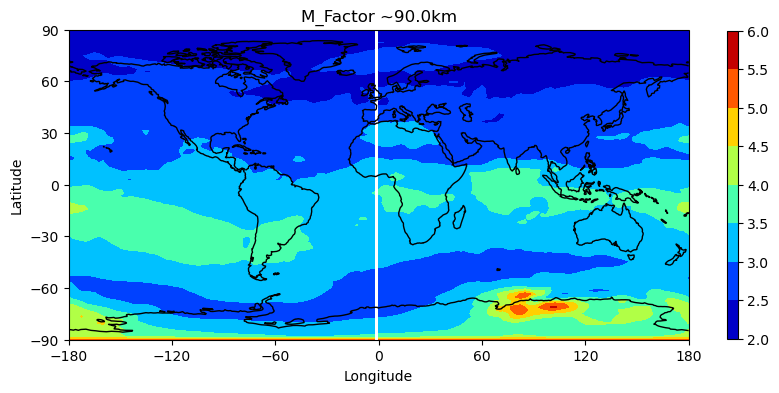

In [13]:
####### Plot M_Factor at specified altitude ########


# # Create a 2D grid using meshgrid
# lon_2d, lat_2d = np.meshgrid(lon, lat)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
contour = ax.contourf(lon, lat, sel_M_Factor, cmap='jet'#, levels=np.linspace(0, 0.5, 11)
                      , transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour
                    #, label=''
                    , ax=ax, orientation='vertical', pad=0.05, aspect=30, shrink=0.5)
ax.coastlines()

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Latitude')
ax.set_title(f'M_Factor ~{desired_altitude_km}km')

#gl = ax.gridlines(draw_labels=True, linestyle='--')

figname = f'M_Factor_{desired_altitude_km}.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

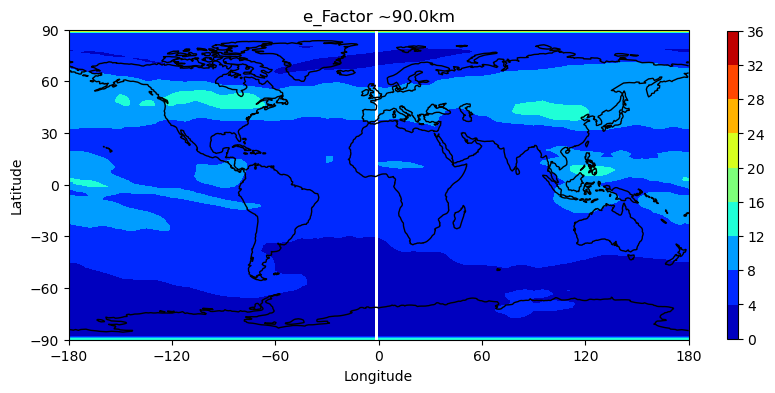

In [14]:
####### Plot e_Factor at specified altitude ########


# # Create a 2D grid using meshgrid
# lon_2d, lat_2d = np.meshgrid(lon, lat)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
contour = ax.contourf(lon, lat, sel_e_Factor, cmap='jet'#, levels=np.linspace(0, 0.5, 11)
                      , transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour
                    #, label=''
                    , ax=ax, orientation='vertical', pad=0.05, aspect=30, shrink=0.5)
ax.coastlines()

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Latitude')
ax.set_title(f'e_Factor ~{desired_altitude_km}km')

#gl = ax.gridlines(draw_labels=True, linestyle='--')

figname = f'e_Factor_{desired_altitude_km}.png'
plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

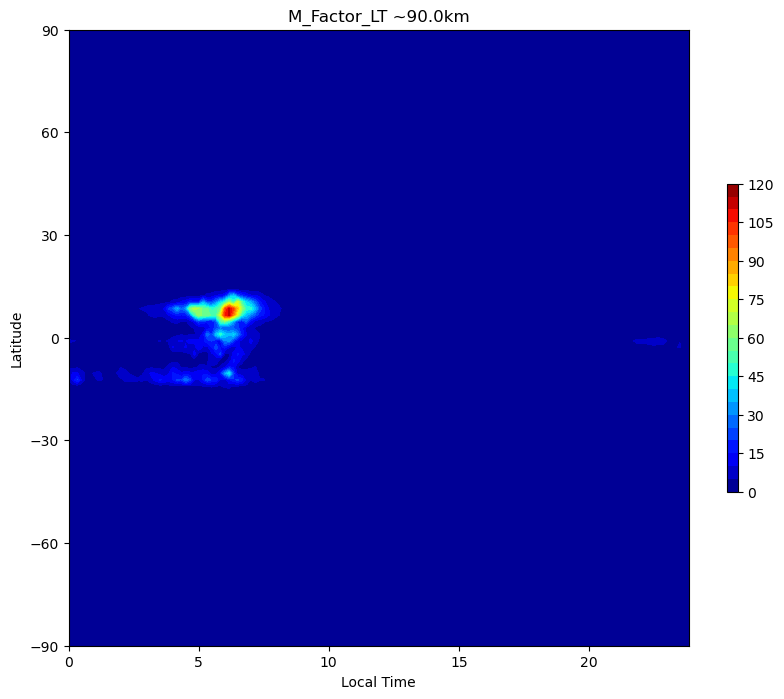

In [108]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(LT, lat, sel_M_Factor_LT
                      , cmap='jet'
                     # , norm=LogNorm() 
                      , levels=np.linspace(0, 120, 25) 
                     )
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, shrink=0.5)

#ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_xlabel('Local Time')
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Latitude')
ax.set_title(f'M_Factor_LT ~{desired_altitude_km}km')

#gl = ax.gridlines(draw_labels=True, linestyle='--')

figname = f'M_Factor_LT_{desired_altitude_km}.png'
#plt.savefig('./Figures/Factor/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()